# Final Challenge 

The aim of the challenge is to expose the participants to a real world problem. After days of learning the Introduction of python, libraries(numpy & pandas) and Visualizations.
The Final challenge is the Data science supermarket challenge(regression problem)
* N.B : This model is for teaching purposes.

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

In [2]:
supermarket = pd.read_csv('train.csv')

In [3]:
supermarket.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


Lets obtain information about the data 

In [4]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


Obtain unique values

In [5]:
supermarket.nunique()

Product_Identifier                1451
Supermarket_Identifier              10
Product_Supermarket_Identifier    4990
Product_Weight                     399
Product_Fat_Content                  3
Product_Shelf_Visibility          4638
Product_Type                        16
Product_Price                     3522
Supermarket_Opening_Year             9
Supermarket _Size                    3
Supermarket_Location_Type            3
Supermarket_Type                     4
Product_Supermarket_Sales         2686
dtype: int64

Obtain Statistical Description

In [6]:
supermarket.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


The identification column isnt necessary, so lets remove. We do this by using 'drop'. 

In [7]:
#drop_column = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']
#supermarkett = supermarket.drop(drop_column, axis=1)

In [8]:
supermarket.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [9]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4188 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 3540 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [10]:
supermarket.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


From the above we need to group the data into categorical and numerical columns.

In [11]:
cat_col = ['Supermarket_Identifier','Product_Fat_Content','Product_Type',
           'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]
num_col = ['Product_Weight', 'Product_Shelf_Visibility','Product_Price', 
           'Supermarket_Opening_Year', 'Product_Supermarket_Sales', ]

In [12]:
#OR
#cat_col=[col for col in supermarket.columns if supermarket[col].nunique()<20]
#num_col=list(set(supermarket.columns)-set(cat_col))

Fill in the missing value

In [13]:
cols = ["Supermarket _Size"]
supermarket[cols]=supermarket[cols].fillna(supermarket.mode().iloc[0])
#supermarket['Supermarket _Size'].fillna('unknown',inplace=True)
supermarket['Product_Weight'].fillna(supermarket['Product_Weight'].mean(),inplace=True);

In [14]:
supermarket.isnull().sum()

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket _Size                 0
Supermarket_Location_Type         0
Supermarket_Type                  0
Product_Supermarket_Sales         0
dtype: int64

## Visualizations 

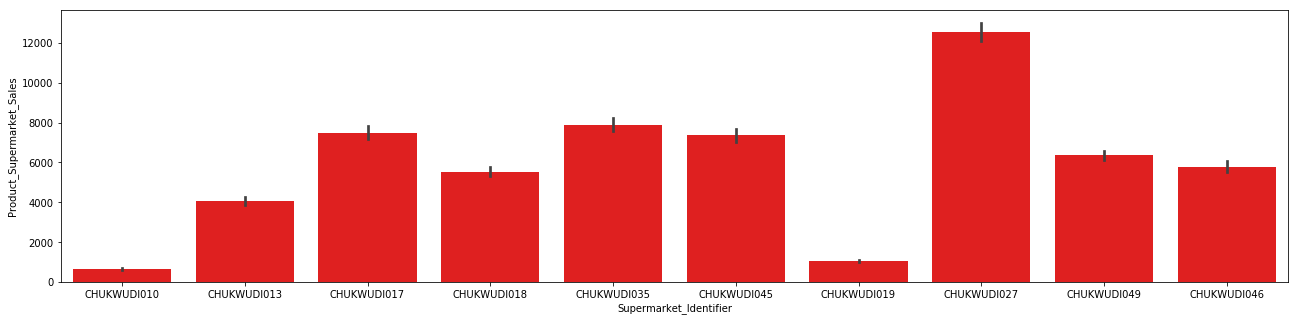

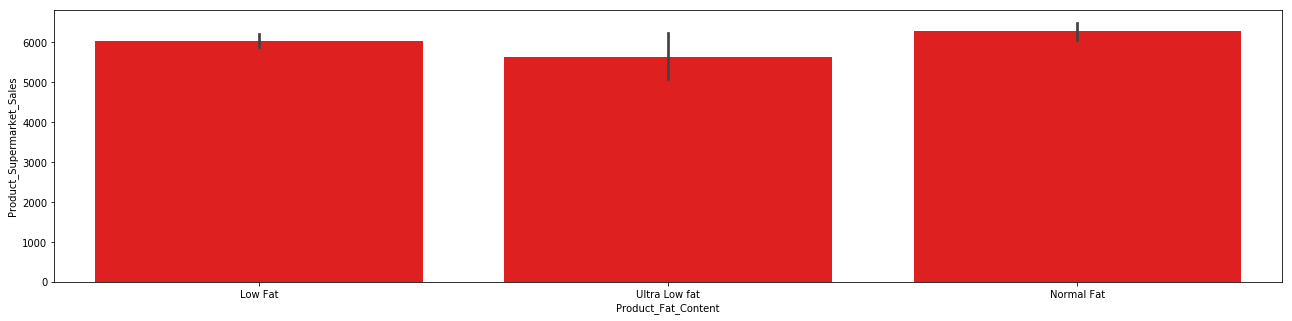

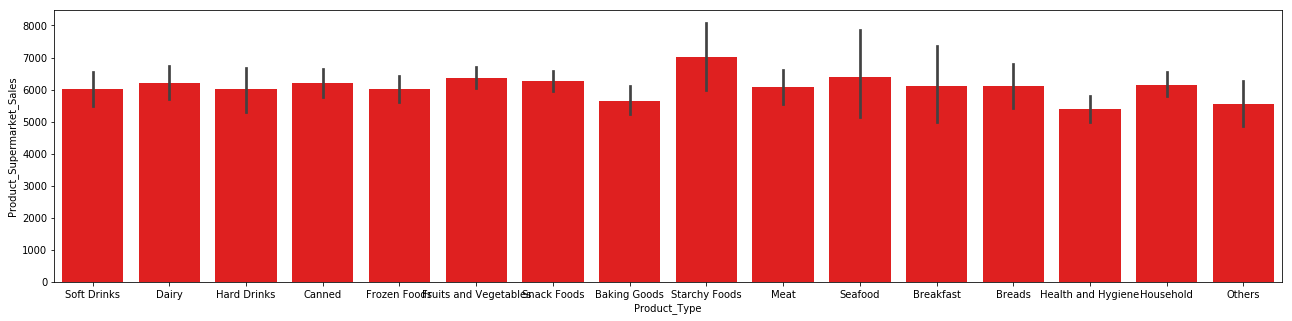

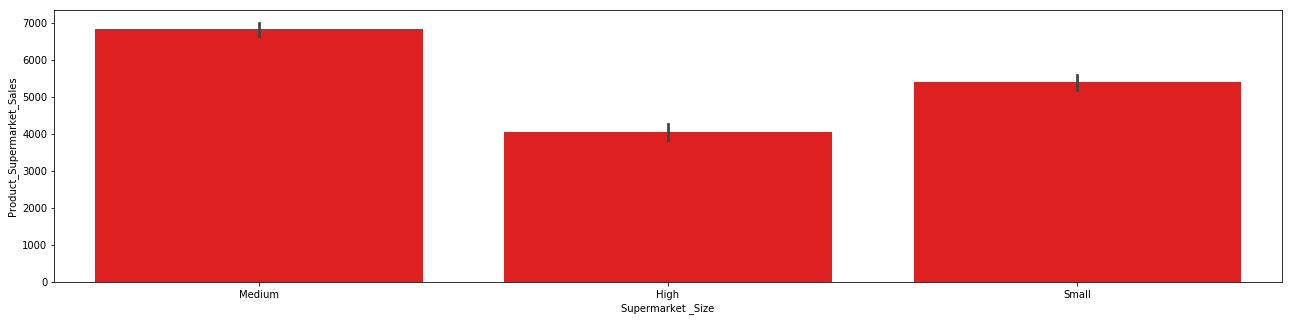

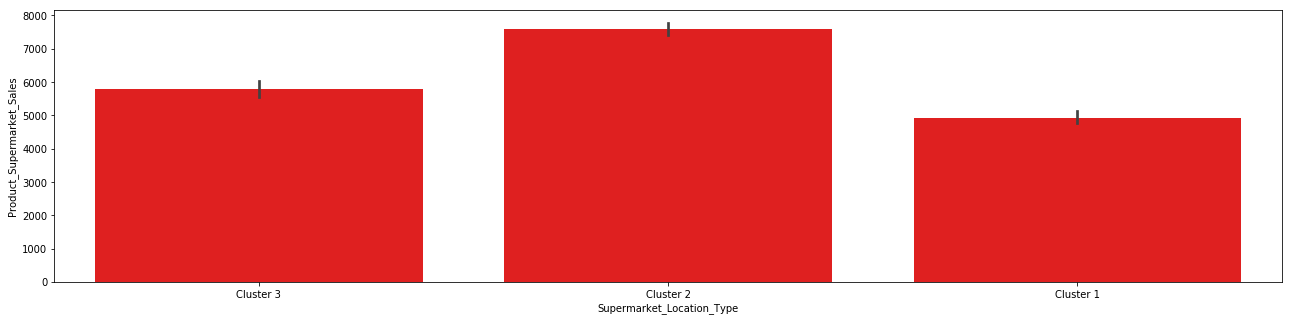

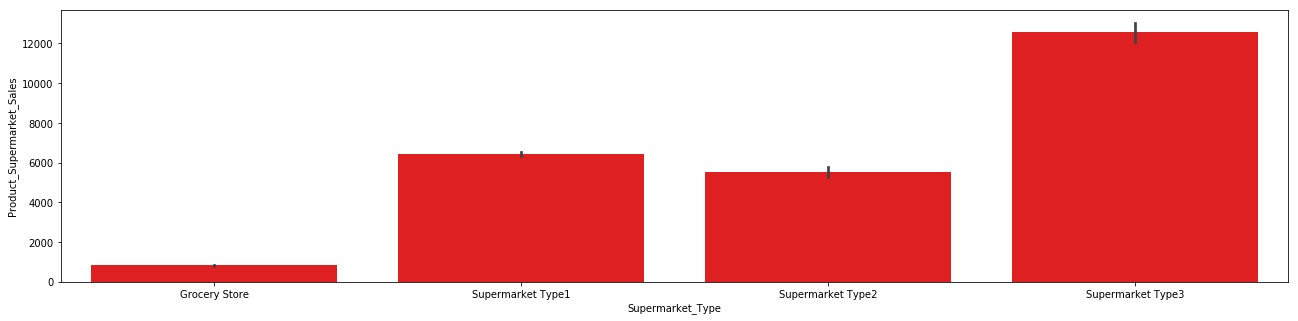

In [15]:
def plot_bar(data, cols, col_y = None):
    for col in cols:
        plt.figure(figsize=(22,5))
        sns.barplot(y=col_y, x=col, data=data,color='red')
        plt.ylabel(col_y) # Set text for the x axis
        plt.xlabel(col)# Set text for y axis
        plt.show()
        
plot_bar(data=supermarket,cols=cat_col,col_y='Product_Supermarket_Sales')

### Distribution of Numerical Variables. 

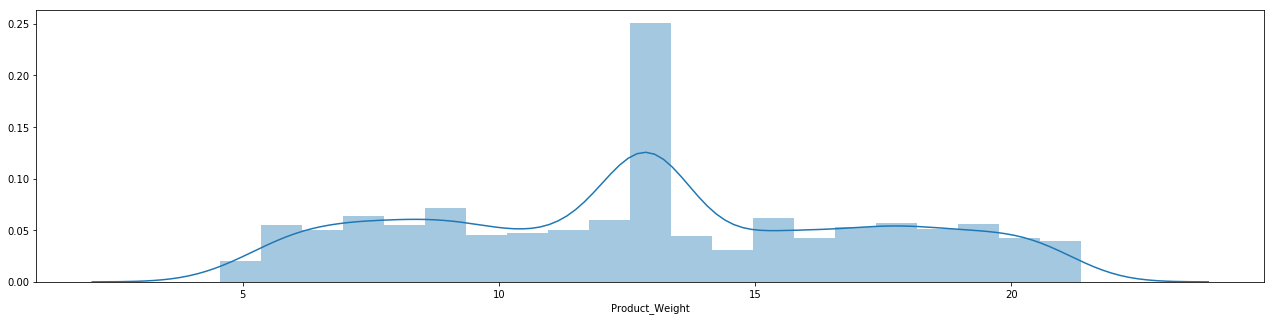

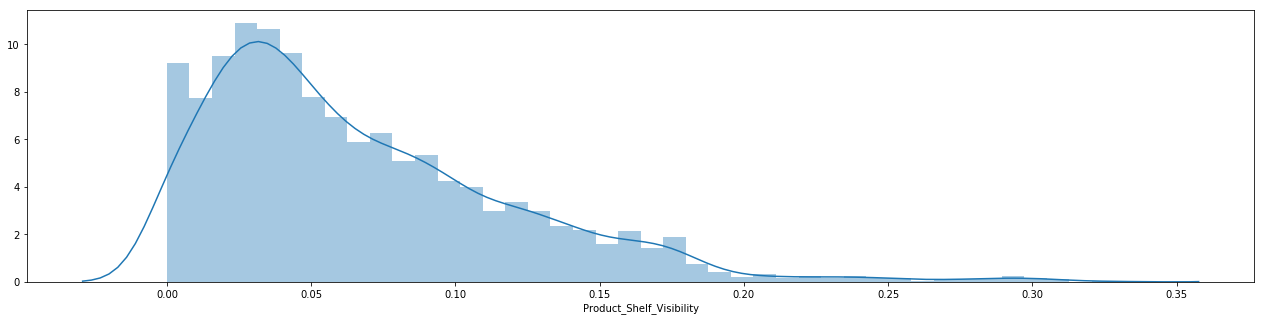

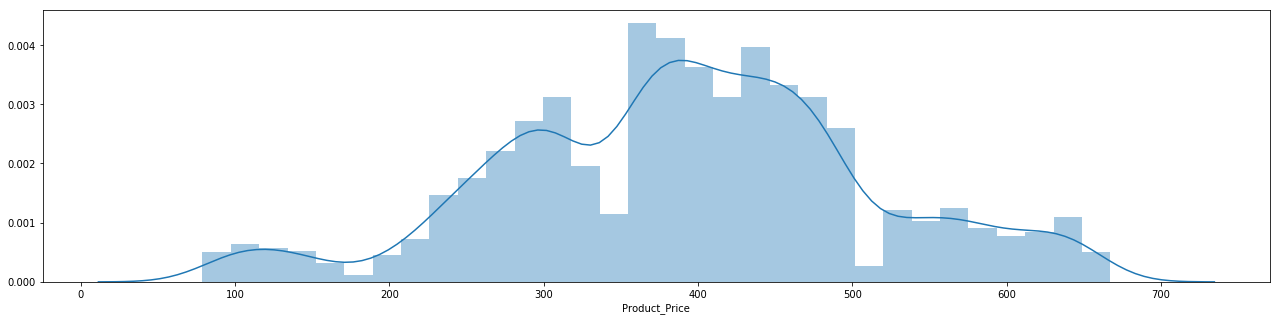

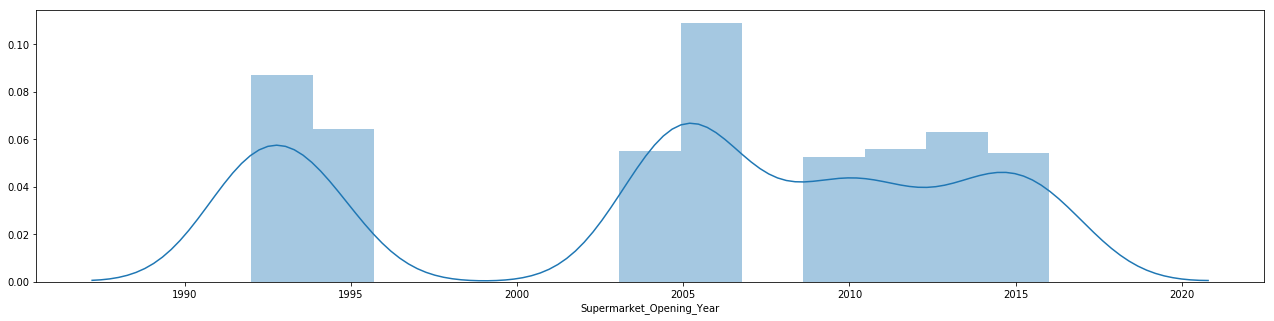

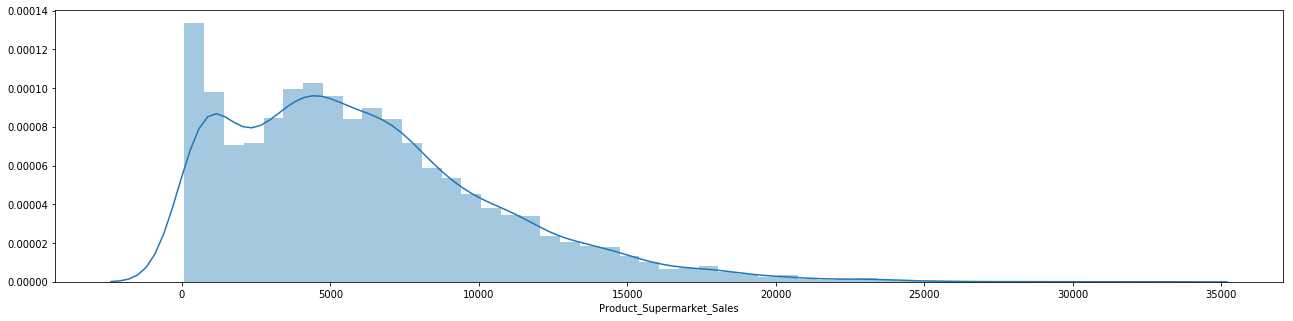

In [16]:
def plot_num(data, cols):
    for col in cols:
        plt.figure(figsize=(22,5))
        sns.distplot(data[col])
       
        plt.show()
        
plot_num(data=supermarket,cols=num_col)

## Feature Engineering 

In [17]:
supermarket.shape

(4990, 13)

In [18]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
Product_Identifier                4990 non-null object
Supermarket_Identifier            4990 non-null object
Product_Supermarket_Identifier    4990 non-null object
Product_Weight                    4990 non-null float64
Product_Fat_Content               4990 non-null object
Product_Shelf_Visibility          4990 non-null float64
Product_Type                      4990 non-null object
Product_Price                     4990 non-null float64
Supermarket_Opening_Year          4990 non-null int64
Supermarket _Size                 4990 non-null object
Supermarket_Location_Type         4990 non-null object
Supermarket_Type                  4990 non-null object
Product_Supermarket_Sales         4990 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [19]:
print("Original features:\n", list(supermarket.columns), "\n")

Original features:
 ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier', 'Product_Weight', 'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type', 'Product_Price', 'Supermarket_Opening_Year', 'Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type', 'Product_Supermarket_Sales'] 



In [20]:
supermarket.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,Medium,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [21]:
supermarket_new =pd.get_dummies(supermarket, prefix=['Product_Fat_Content', 'Product_Type','Supermarket_Size', 'Supermarket_Location_Type', 'Supermarket_Type'], columns=['Product_Fat_Content', 'Product_Type','Supermarket _Size', 'Supermarket_Location_Type', 'Supermarket_Type'])

In [22]:
supermarket_new.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Product_Fat_Content_Low Fat,Product_Fat_Content_Normal Fat,...,Supermarket_Size_High,Supermarket_Size_Medium,Supermarket_Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,0.068535,357.54,2005,709.08,1,0,...,0,1,0,0,0,1,1,0,0,0
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,0.040912,355.79,1994,6381.69,1,0,...,1,0,0,0,0,1,0,1,0,0
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,0.041178,350.79,2014,6381.69,1,0,...,0,1,0,0,1,0,0,1,0,0
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,0.041113,355.04,2016,2127.23,1,0,...,0,1,0,0,0,1,0,0,1,0
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,0.000000,354.79,2011,2481.77,0,0,...,0,0,1,0,1,0,0,1,0,0


In [23]:
del supermarket_new['Product_Identifier']

In [24]:
supermarket_new = supermarket_new.drop(['Product_Supermarket_Identifier'], axis = 1)

In [25]:
supermarket_new = supermarket_new.drop(['Supermarket_Identifier'], axis = 1)

In [26]:
supermarket_new.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Product_Fat_Content_Low Fat,Product_Fat_Content_Normal Fat,Product_Fat_Content_Ultra Low fat,Product_Type_Baking Goods,Product_Type_Breads,...,Supermarket_Size_High,Supermarket_Size_Medium,Supermarket_Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,11.6,0.068535,357.54,2005,709.08,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,6381.69,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,6381.69,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,2127.23,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,2481.77,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [27]:
supermarket_new.shape

(4990, 34)

## Training- Splitting Data 

In [28]:
from sklearn.model_selection import train_test_split
feature_col_names=['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price', 'Supermarket_Opening_Year', 'Product_Fat_Content_Low Fat', 'Product_Fat_Content_Normal Fat', 'Product_Fat_Content_Ultra Low fat', 'Product_Type_Baking Goods', 'Product_Type_Breads', 'Product_Type_Breakfast', 'Product_Type_Canned', 'Product_Type_Dairy', 'Product_Type_Frozen Foods', 'Product_Type_Fruits and Vegetables', 'Product_Type_Hard Drinks', 'Product_Type_Health and Hygiene', 'Product_Type_Household', 'Product_Type_Meat', 'Product_Type_Others', 'Product_Type_Seafood', 'Product_Type_Snack Foods', 'Product_Type_Soft Drinks', 'Product_Type_Starchy Foods', 'Supermarket_Size_High', 'Supermarket_Size_Medium', 'Supermarket_Size_Small', 'Supermarket_Location_Type_Cluster 1', 'Supermarket_Location_Type_Cluster 2', 'Supermarket_Location_Type_Cluster 3', 'Supermarket_Type_Grocery Store', 'Supermarket_Type_Supermarket Type1', 'Supermarket_Type_Supermarket Type2', 'Supermarket_Type_Supermarket Type3']
predicted_class_names=['Product_Supermarket_Sales']
X=supermarket_new[feature_col_names].values
y=supermarket_new[predicted_class_names].values 
split_test_size=0.30
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=42)
   

In [29]:
print("{0:0.2f}% in training set".format((len(X_train)/len(supermarket_new.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(supermarket_new.index)) * 100))

70.00% in training set
30.00% in test set


## Train Data 

### Gradient Boosting 

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(learning_rate=0.089, max_depth=3.6, loss='lad',min_samples_split=500,min_samples_leaf=50, n_estimators=100)
gbr.fit(X_train, y_train.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.089, loss='lad', max_depth=3.6,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [31]:
gbrpred=gbr.predict(X_train)
gbrpred_test=gbr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [33]:
print("Accuracy on training set: {:.7f}".format(gbr.score(X_train, y_train)))
print("Accuracy on test set: {:.7f}".format(gbr.score(X_test, y_test)))

Accuracy on training set: 0.5816901
Accuracy on test set: 0.5571828


In [34]:
MSE= mean_squared_error(y_train, gbrpred)
MSE_test= mean_squared_error(y_test, gbrpred_test)
print("MSE:", MSE)
print("MSE Test:", MSE_test)
RMSE=sqrt(MSE)
RMSE_test=sqrt(MSE_test)
print("RMSE:", RMSE)
print("RMSE Test:", RMSE_test)


MSE: 8277272.872750353
MSE Test: 8739093.041107776
RMSE: 2877.025003845179
RMSE Test: 2956.1957041284963


## Linear Regression

In [35]:

from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()
lr.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
print("Accuracy on training set: {:.7f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.7f}".format(lr.score(X_test, y_test)))

Accuracy on training set: 0.5628286
Accuracy on test set: 0.5434924


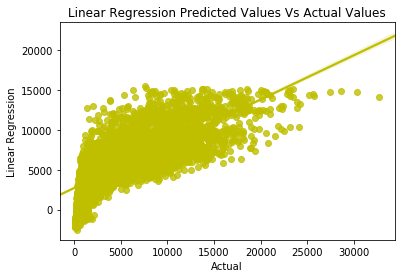

In [38]:
linearRegression=lr.predict(X)
sns.regplot(x=y, y=linearRegression, color='y')
plt.title('Linear Regression Predicted Values Vs Actual Values')
plt.xlabel('Actual')
plt.ylabel('Linear Regression')
plt.show()

In [39]:
ynew= lr.predict(X_test)
np.savetxt("AII2.csv",ynew,delimiter=",")